In [1]:
import numpy as np

In [ ]:
n = 5001
m = 5001
set_I = range(n)
set_J = range(m)

x = np.linspace(-20,20,n)
y = np.linspace(-20,20,m)

a = np.zeros(n)
b = np.zeros(m)

for i in range(n):
	a[i] = np.exp(-1*(x[i]-15)**2/20)

for i in range(m):
	b[i] = np.exp(-1*(y[i]+15)**2/20)
    
a = a/np.sum(a)
b = b/np.sum(b)

c = np.zeros((n,m))
for i in range(n):
	for j in range(m):
		c[i,j] = (x[i] - y[j])**2

In [ ]:
def f(x):
    p = np.reshape(np.copy(x),(n,m))
    v1 = np.sum(p*c) 
    v2 = gamma*np.sum((a-np.dot(p,np.ones(m)))**2)/2 + gamma*np.sum((b-np.dot(np.ones(n),p))**2)/2
    return v1 + v2

def g(x):
    p = np.reshape(np.copy(x),(n,m))
    G = c - gamma*np.outer(a-np.dot(p,np.ones(m)),np.ones(m)) - gamma*np.outer(np.ones(n),b-np.dot(np.ones(n),p))
    return np.reshape(G,n*m)

In [ ]:
P = np.ones((n*m))
gamma = 1e3

In [ ]:
g(P)

In [ ]:
import scipy.optimize as so
import time

In [ ]:
bound = [(0,None) for i in range(n) for j in range(m)]

In [ ]:
st = time.time()
r = so.fmin_l_bfgs_b(f, P, fprime=g, bounds = bound, iprint=2)
et = time.time()
print(et-st)

In [ ]:
r

In [ ]:
f(r[0])

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

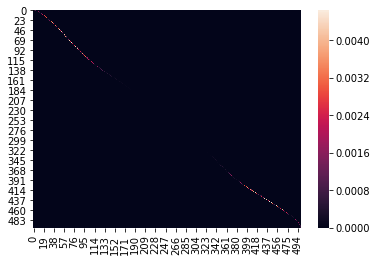

In [18]:
sns.heatmap(p)